Initial data snapshot:
   age     sex     bmi  children smoker     region   charges
0   19  female  27.900         0    yes  southwest  16884.92
1   18    male  33.770         1     no  southeast   1725.55
2   28    male  33.000         3     no  southeast   4449.46
3   33    male  22.705         0     no  northwest  21984.47
4   32  female  28.880         0     no  northwest   3866.86

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing values found.

Duplicates dropped: 0

Data types before transformation:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Data types after conversion:
 age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

BMI category value counts:
 bmi_category

C:\Users\0911d\AppData\Local\Temp\ipykernel_11416\3103438267.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_gender = df.groupby('sex')['charges'].mean().reset_index()


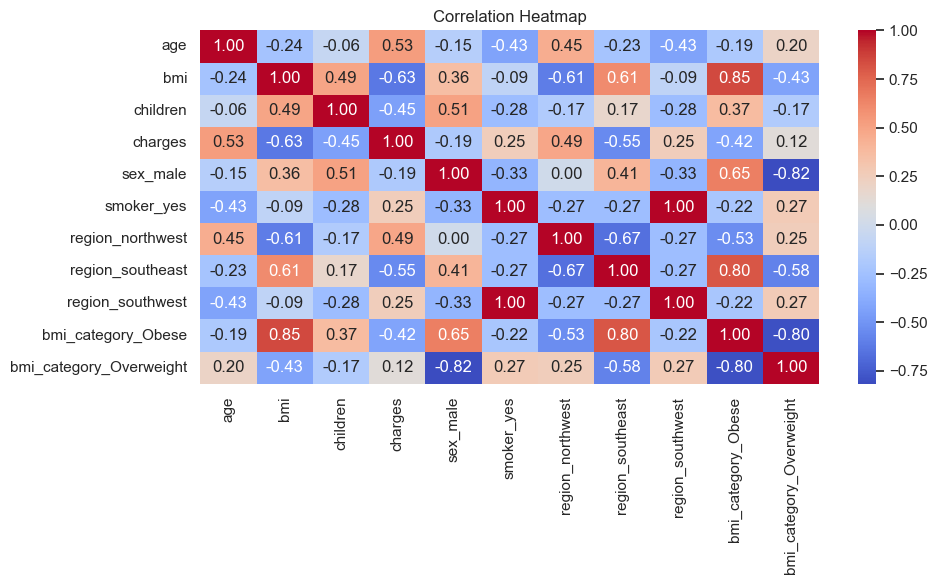

C:\Users\0911d\AppData\Local\Temp\ipykernel_11416\3103438267.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='charges', palette='Set3')


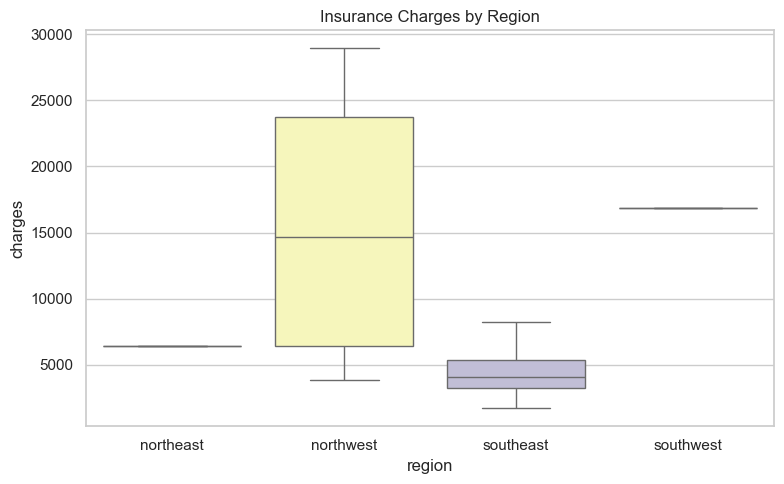

C:\Users\0911d\AppData\Local\Temp\ipykernel_11416\3103438267.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')


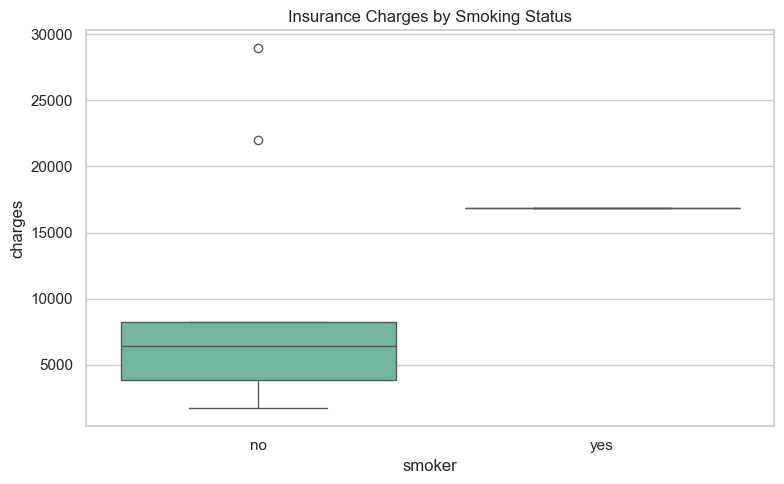

C:\Users\0911d\AppData\Local\Temp\ipykernel_11416\3103438267.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bmi_category', palette='Set1', order=['Underweight', 'Normal', 'Overweight', 'Obese'])


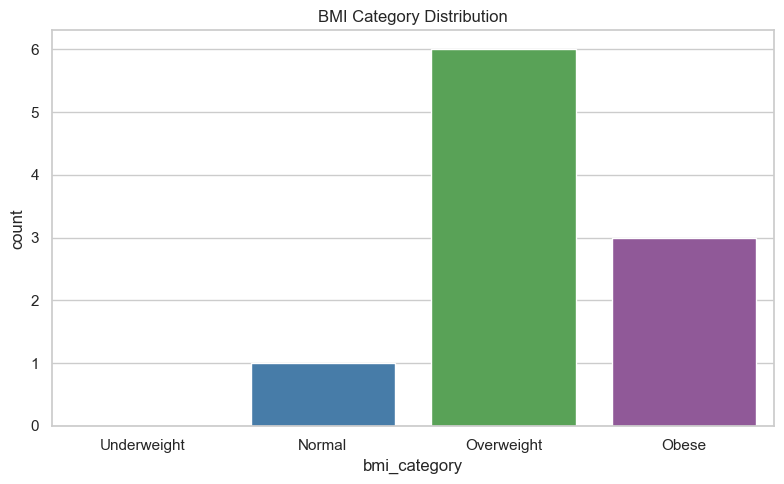

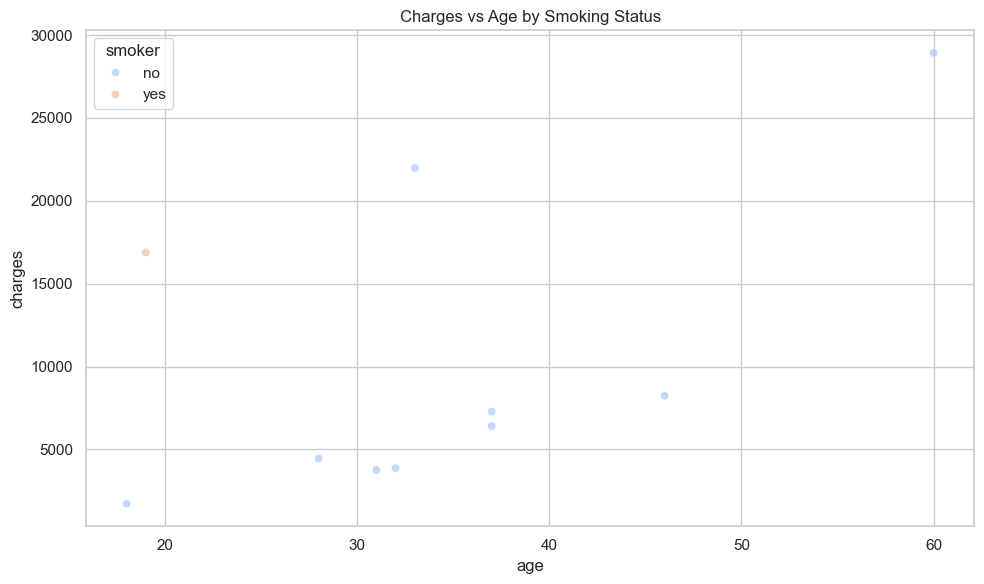

C:\Users\0911d\AppData\Local\Temp\ipykernel_11416\3103438267.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='children', y='charges', palette='Set3')


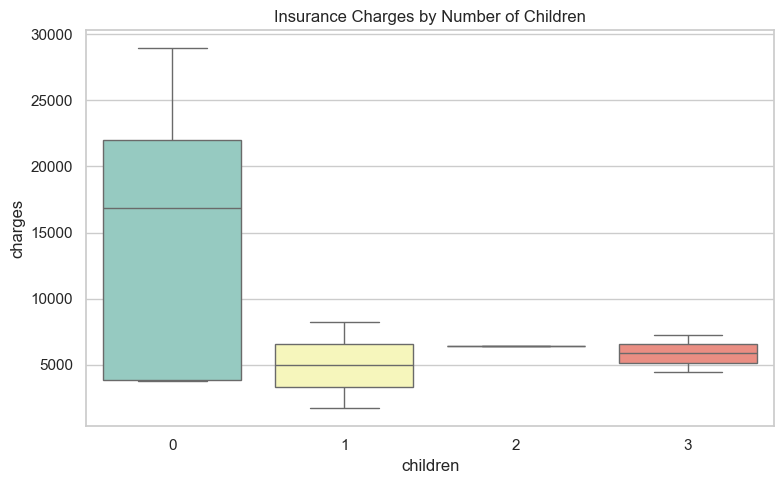

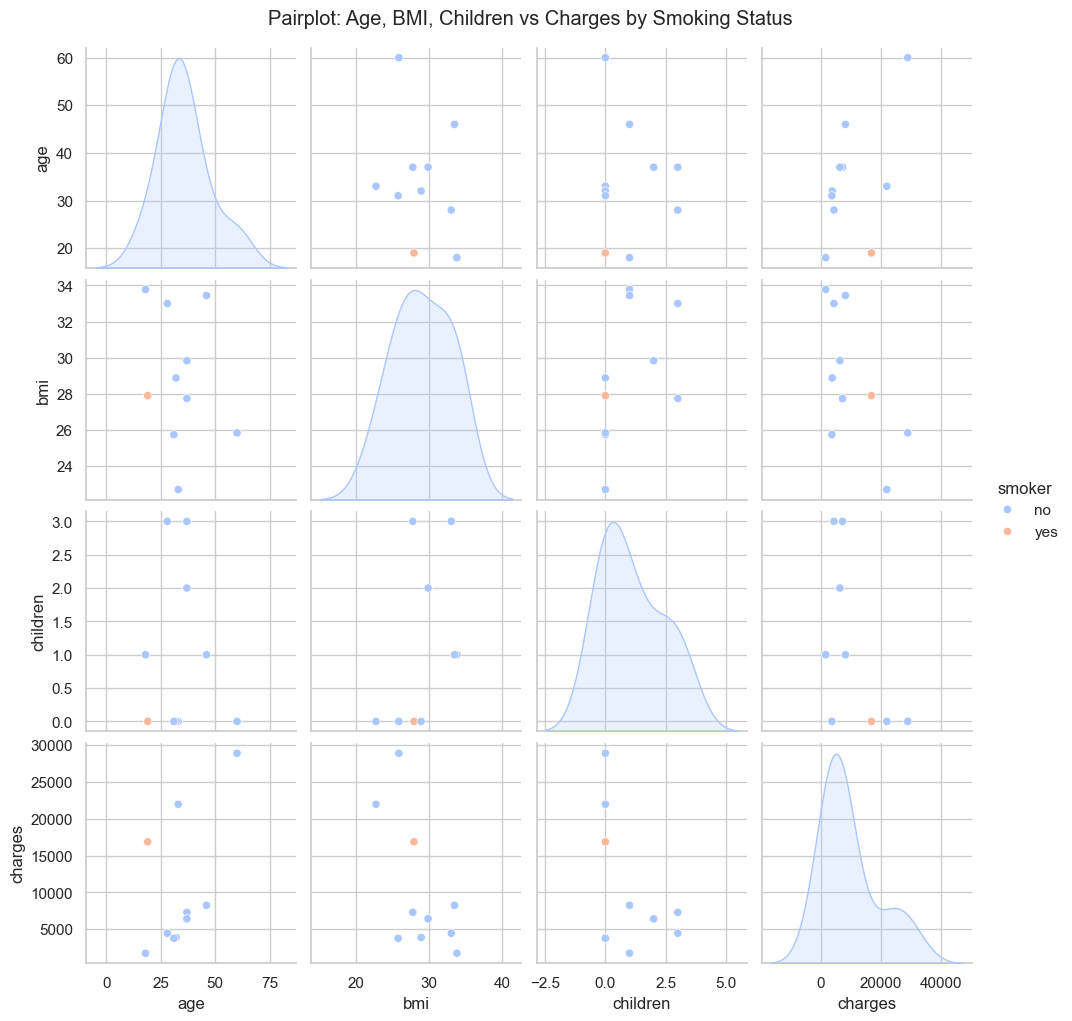


Linear Regression Model Performance:
Mean Squared Error: 82095015.53
R-squared: -13.99


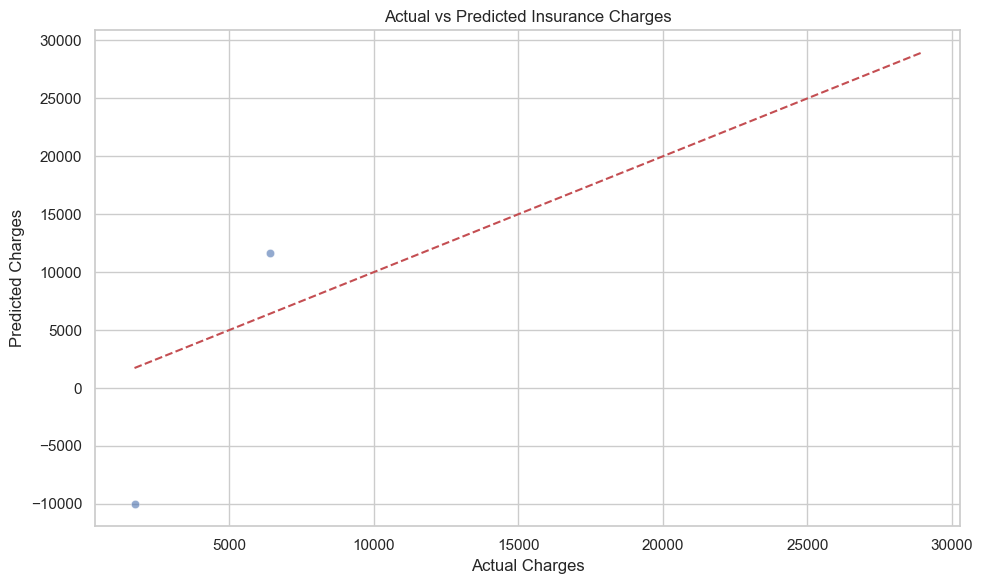

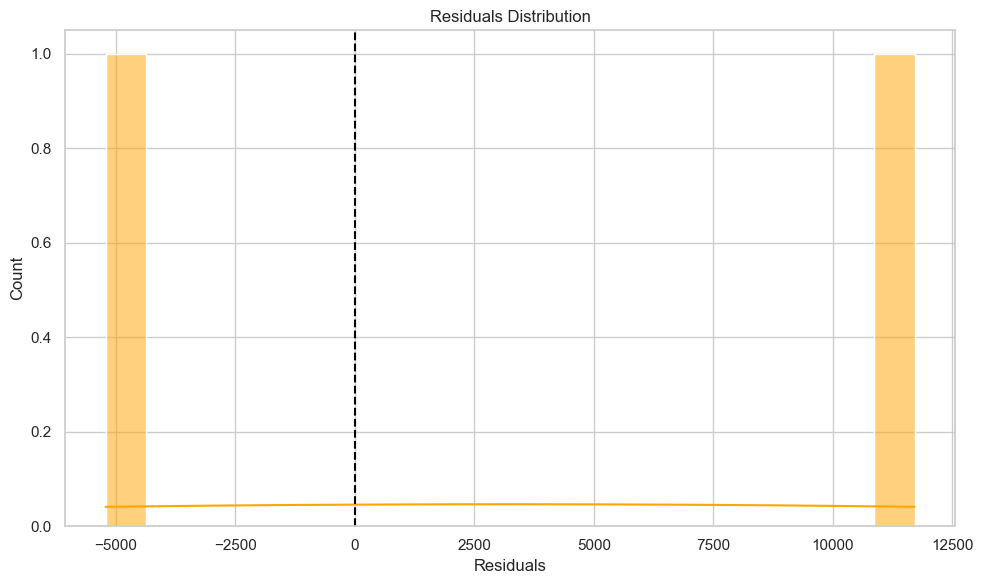

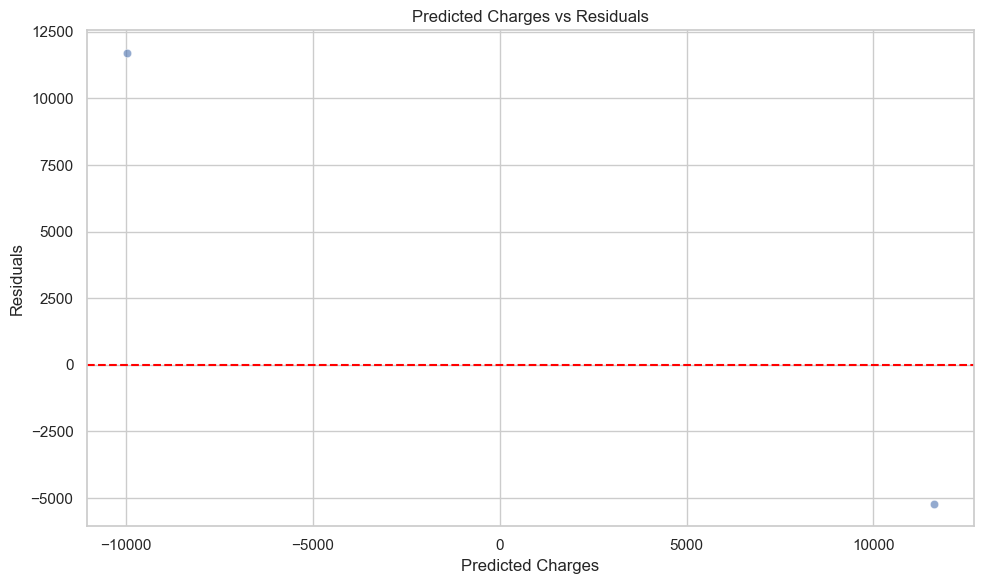

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
file_path = r"C:\Users\0911d\Desktop\insurance.csv"
df = pd.read_csv(file_path)

print("Initial data snapshot:")
print(df.head())
# --- ETL Phase ---

# Check for missing values and handle them (if any)
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

if missing_values.any():
    # Strategy example: drop rows with missing values (can also impute)
    df = df.dropna()
    print("Missing values handled by dropping rows.")
else:
    print("No missing values found.")

# Check and drop duplicates to improve data quality
initial_len = len(df)
df = df.drop_duplicates()
duplicates_dropped = initial_len - len(df)
print(f"\nDuplicates dropped: {duplicates_dropped}")

# Validate data types
print("\nData types before transformation:\n", df.dtypes)

# Data consistency check example (optional):
# Ensure categorical columns are of type 'category' for efficiency
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nData types after conversion:\n", df.dtypes)

# Create BMI category (transformation)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)
df['bmi_category'] = df['bmi_category'].astype('category')

print("\nBMI category value counts:\n", df['bmi_category'].value_counts())

# One-hot encode categorical variables for modeling (drop_first=True avoids dummy variable trap)
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nEncoded DataFrame sample:")
print(df_encoded.head())

# --- Exploratory Data Analysis ---

print("\nSummary statistics:")
print(df.describe())

# Average charges by gender
avg_charges_gender = df.groupby('sex')['charges'].mean().reset_index()
print("\nAverage Charges by Gender:")
print(avg_charges_gender)

# --- Visualisations ---

sns.set(style="whitegrid")

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Charges by region
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='region', y='charges', palette='Set3')
plt.title("Insurance Charges by Region")
plt.tight_layout()
plt.show()

# Charges by smoking status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title("Insurance Charges by Smoking Status")
plt.tight_layout()
plt.show()

# BMI category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bmi_category', palette='Set1', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title("BMI Category Distribution")
plt.tight_layout()
plt.show()

# Charges vs Age colored by smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title("Charges vs Age by Smoking Status")
plt.tight_layout()
plt.show()

# Charges by number of children
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='children', y='charges', palette='Set3')
plt.title("Insurance Charges by Number of Children")
plt.tight_layout()
plt.show()

# Pairplot for selected variables by smoker status
sns.pairplot(df, hue='smoker', vars=['age', 'bmi', 'children', 'charges'], palette='coolwarm')
plt.suptitle("Pairplot: Age, BMI, Children vs Charges by Smoking Status", y=1.02)
plt.show()

# --- Modeling: Linear Regression ---

# Prepare features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.tight_layout()
plt.show()

# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Predicted Charges vs Residuals")
plt.tight_layout()
plt.show()